# Cross Validation

In Machine Learning, we train predictive models by providing it preprocessed data. The model extracts relationships between these datapoints and formulates a function that best describes the relationship we want to understand, measure, or predict.<br><br>
**Question: How can a model have a 100% accuracy score?**<br><br>
To truly test a models performance, we want to assess how well the model genralizes across other datasets. How is this done?

### Python Implementation

In [77]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('housing - housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [78]:
# Encoding & Cleaning
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [79]:
cat_var = pd.get_dummies(df.ocean_proximity)
cat_var

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [80]:
df.drop(['ocean_proximity'], axis=1, inplace=True)
df = pd.concat([df, cat_var], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [81]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [82]:
df.dropna(inplace=True)

In [83]:
df.shape

(20433, 14)

In [84]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create inputs and output dataframe split
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Create model
model = LinearRegression()

# Fit training data to model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred

array([121187.14390078, 159370.50929144, 217020.25536954, ...,
       471606.0780312 , 308049.09309257, 156293.68712164])

## Model Evaluation

### SKLearn's Metrics Library

In [85]:
# Import SKLearn performance metrics functions
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'mae: {mae}, rmse: {rmse}, , r2: {r2}')

mae: 49677.64747881093, rmse: 68859.5156720015, , r2: 0.6407891237492725


What happens when `shuffle=True`?

In [86]:
results_df = pd.DataFrame({'method':[], 'mae':[], 'rmse':[], 'r2':[]})
results_df = results_df.append({'method': 'non-cv', 'mae':mae, 'rmse':rmse, 'r2':r2}, ignore_index=True)
results_df

C:\Users\daiya\AppData\Local\Temp\ipykernel_12920\3199365669.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'method': 'non-cv', 'mae':mae, 'rmse':rmse, 'r2':r2}, ignore_index=True)


,method,mae,rmse,r2
0,non-cv,49677.647479,68859.515672,0.640789


shuffles the data for the training model

### Cross Validation by Hand

In [87]:
# Create model
cv_model = LinearRegression()

# Initialize empty list for meausring performance
maes = []
rmses = []
r2s = []

# Define iterations
cv = 100

# Create CV Loop 
for i in range(cv):

    # Create train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

    
    # Fit training data to model
    cv_model.fit(X_train, y_train)

    # Make predictions
    y_pred = cv_model.predict(X_test)
    
    # Compute metrics and add them to lists
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)

    r2 = r2_score(y_test, y_pred)
    r2s.append(r2)

avg_maes = np.mean(maes)
avg_rmses = np.mean(rmses)
avg_r2s = np.mean(r2s)

print(avg_maes, avg_rmses, avg_r2s)

49848.15206157466 68860.77130088946 0.6438550718594704


In [88]:
results_df = results_df.append({'method': 'basic_cv', 'mae':avg_maes, 'rmse':avg_rmses, 'r2':avg_r2s}, ignore_index=True)
results_df

C:\Users\daiya\AppData\Local\Temp\ipykernel_12920\592953758.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'method': 'basic_cv', 'mae':avg_maes, 'rmse':avg_rmses, 'r2':avg_r2s}, ignore_index=True)


,method,mae,rmse,r2
0,non-cv,49677.647479,68859.515672,0.640789
1,basic_cv,49848.152062,68860.771301,0.643855


### K-Fold Cross Validation

How do we cross validate our model?

In [89]:
# Import SKLearns KFold 
from sklearn.model_selection import KFold

In [90]:
# Without shuffle
kf = KFold(n_splits=4)

for train_set, test_set in kf.split(X_train):
    print(f'Training set 75%: {train_set} \n')
    print(f'Testing set 25%: {test_set} \n')
    print(f'---------------------------------------\n')

Training set 75%: [ 3831  3832  3833 ... 15321 15322 15323] 

Testing set 25%: [   0    1    2 ... 3828 3829 3830] 

---------------------------------------

Training set 75%: [    0     1     2 ... 15321 15322 15323] 

Testing set 25%: [3831 3832 3833 ... 7659 7660 7661] 

---------------------------------------

Training set 75%: [    0     1     2 ... 15321 15322 15323] 

Testing set 25%: [ 7662  7663  7664 ... 11490 11491 11492] 

---------------------------------------

Training set 75%: [    0     1     2 ... 11490 11491 11492] 

Testing set 25%: [11493 11494 11495 ... 15321 15322 15323] 

---------------------------------------



In [91]:
# With shuffle
kf = KFold(n_splits=4, shuffle=True)

for train_set, test_set in kf.split(X_train):
    print(f'Training set 75%: {train_set} \n')
    print(f'Testing set 25%: {test_set} \n')
    print(f'---------------------------------------\n')

Training set 75%: [    0     2     4 ... 15321 15322 15323] 

Testing set 25%: [    1     3     6 ... 15308 15315 15316] 

---------------------------------------

Training set 75%: [    0     1     2 ... 15321 15322 15323] 

Testing set 25%: [    4    13    15 ... 15309 15314 15319] 

---------------------------------------

Training set 75%: [    1     2     3 ... 15319 15321 15323] 

Testing set 25%: [    0    12    17 ... 15312 15320 15322] 

---------------------------------------

Training set 75%: [    0     1     3 ... 15319 15320 15322] 

Testing set 25%: [    2     5    11 ... 15318 15321 15323] 

---------------------------------------



In [92]:
# Create model
kfcv_model = LinearRegression()

# Initialize empty list for meausring performance
maes = []
rmses = []
r2s = []

# With replacement
kf = KFold(n_splits=10, shuffle=True)

# Create KFold Cross Validation Loop
for train_index, test_index in kf.split(X_train):

    # Use index to create training and testing subsets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit training data to model
    kfcv_model.fit(X_train, y_train)

    # Make predictions
    y_pred = kfcv_model.predict(X_test)
    
    # Compute metrics and add them to lists
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)

    r2 = r2_score(y_test, y_pred)
    r2s.append(r2)

avg_maes = np.mean(maes)
avg_rmses = np.mean(rmses)
avg_r2s = np.mean(r2s)

print(avg_maes, avg_rmses, avg_r2s)
    

48389.2027580166 67415.34197001325 0.6330323103108704


In [93]:
results_df = results_df.append({'method': 'kfold_cv', 'mae':avg_maes, 'rmse':avg_rmses, 'r2':avg_r2s}, ignore_index=True)
results_df

C:\Users\daiya\AppData\Local\Temp\ipykernel_12920\2209262222.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'method': 'kfold_cv', 'mae':avg_maes, 'rmse':avg_rmses, 'r2':avg_r2s}, ignore_index=True)


,method,mae,rmse,r2
0,non-cv,49677.647479,68859.515672,0.640789
1,basic_cv,49848.152062,68860.771301,0.643855
2,kfold_cv,48389.202758,67415.341970,0.633032


---
## Lab
### Objective
Increase performance methods through:
* Data Cleaning (Preserving data)
* Feature selection (only choosing the best columns to train our model on)
* Visualize Results

In [94]:
df = pd.read_csv('housing - housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [95]:
# Clean Data
cat_var = pd.get_dummies(df.ocean_proximity)
df.drop(['ocean_proximity'], axis=1, inplace=True)
df = pd.concat([df, cat_var], axis=1)
df.dropna(inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [96]:
# Explore & Select better features
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [97]:
maes = []
rmses = []
r2s = []

# 1. Choose a CV method
lab_model = LinearRegression()
kf = KFold(n_splits=4, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 2. Using your CV method, train & test model 
for train_index, test_index in kf.split(X_train):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lab_model.fit(X_train, y_train)
    y_pred = lab_model.predict(X_test)

# 3. Add metrics to the above lists lists.
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)

    r2 = r2_score(y_test, y_pred)
    r2s.append(r2)


# Get avg of metrics, assign them to variable below (your code in place of "None")
my_avg_mae = np.mean(maes)
my_avg_rmse = np.mean(rmses)
my_avg_r2 = np.mean(r2s)

print(my_avg_mae, my_avg_r2, my_avg_rmse)

48388.65345201059 0.6332523441004965 67434.35234918557


In [98]:
results_df = results_df.append({'method':'lab_cv', 'mae': my_avg_mae, 'rmse': my_avg_rmse, 'r2': my_avg_r2}, ignore_index=True)
results_df

C:\Users\daiya\AppData\Local\Temp\ipykernel_12920\3210768890.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'method':'lab_cv', 'mae': my_avg_mae, 'rmse': my_avg_rmse, 'r2': my_avg_r2}, ignore_index=True)


,method,mae,rmse,r2
0,non-cv,49677.647479,68859.515672,0.640789
1,basic_cv,49848.152062,68860.771301,0.643855
2,kfold_cv,48389.202758,67415.341970,0.633032
3,lab_cv,48388.653452,67434.352349,0.633252


### Visualize Results of Metrics
---


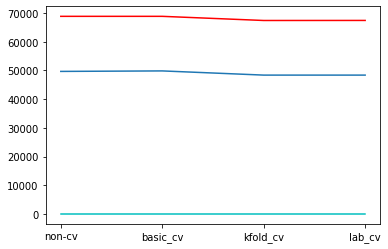

In [103]:
plt.plot(results_df.method, results_df.mae) # mae vs method
plt.plot(results_df.method, results_df.rmse, color='r')  # rmse vs method
plt.plot(results_df.method, results_df.r2, color='c') # r2 vs method